# Tensorflow used to Predict Petrophysical Properties:

Tensorflow used to Estimate the Mode (microns) of the Pore Throat Distribution from porosity and permeability data calibrated to Clerke's Rosetta Stone Arab D Carbonate dataset.
### Introduction
#### Predict Mode of Pore Throats
The objective of this project is to estimate the Mode of the Pore Throat Distribution which would then let us segregate the rock into Macro, Meso and Micro Rock Types (RTs). In this repository we are using Tensorflow  to predict Mode. 

The Arab D data set published by Clerke is quite distinctive. Clerke acquired nearly 450 High Pressure Mercury Injection Capillary Pressure (HPMI) measurements in the Arab D reservoir; however, Clerke's final samples were randomly selected from 1,000's of pre-qualified core samples ensuring a broad distribution and representation of all Petrophysical properties. This created one of the best Core Analysis datasets every collected in our industry. 

Clerke began evaluating this dataset by fitting a Thomeer hyperbolas for each pore system in each sample to generate the published Thomeer Capillary Pressure parameters. From these data Clerke established his Petrophysical Rock Types (PRT) based on the Initial Displacement Pressures for each pore system and the number of pore systems present in each sample. From the figure below it is rather evident that Clerke's PRTs are Petrophysically well-defined in poro-perm space where each color represents a different PRT.  The Capillary Pressure curves and Pore Throat Distributions (PTD) shown on the right hand side of the figure illustrate the unique characteristics of each PRT. 

![TS_Image](PRT.png)

###### The characterization of Clerke's PRTs are shown below:

![TS_Image](Rock-Types.png)

As can be seen in the first figure above, the PRTs are rather well segregated in the Porosity vs. Permeability Cross Plot as they fall in distinct regions or clusters on the Cross Plot.For modeling purposes it is important to take advantage of the excellent correlations between the PRTs. 

This notebook was started from Aman Bhandula's GitHub repository:

https://github.com/Amanbhandula/Prediction-of-reservoir-properties-using-Neural-Network

We used Clerke's Rosetta Stone data and his PRTs as our training set, except that we combined all the macros PRTs into one RT that had a value of 2. We combined all the Type 1 Meso PRT into a RT with a value of 1 and all the Micro PRT compose our third RT with a value of 0. The following is the standard Sigmoid s-curve.

We are using Tensorflow to predict the log10 of the Mode from Porosity and log10 of Permeability. 

Run 1:
We initally make the first training run (Run 1) using 20% of the data for testing with Epochs > 100. Save the training weights from Run 1. 

        #1st run - run > 100 epochs with 20% of the data first for training
        from sklearn.model_selection import train_test_split
        df_train, df_test = train_test_split(df, test_size=0.2)


        '''
        Save the checkpoint training weights and load them again if needed per lines below:
        '''
        if epochs > 100: 
            if input('Save model ? [Y/N]') == 'Y':
                saver.save(sess,'yahoo_dataset.ckpt')
                print('Model Saved') 

Run 2:
In the second run we use all the data for Mode predictions (pred) at each sample level in our dataset. We use 0 Epochs and restore the training weights per the code below.

        #2nd run - now define zone of interest and use checkpoints from training before
        df_train = df[:328]   
        df_test = df[0:]       

        saver.restore(sess,'yahoo_dataset.ckpt')




1 Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008. 

### Load Tensorflow and other programs:

In [1]:
import pandas as pd
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
print(tf.version.VERSION)


2.1.0


# Load Data:

## Load csv file using pandas read_csv:

In [2]:
data = pd.read_csv('RosettaStone_PRT_mode.csv', index_col = 'Sample')

This loads the core porosity, log10 of permeability and log10 of Mode of Pore Throat Distribution (PTD). The exact Mode of the PTD (microns) is calculated using Clerke's Thomeer Capillary Pressure parameters:

            mode (microns) = exp(-1.15*G1)/(214/Pd1)
        
Since the Mode is lognormal in distribution like permeability, we are using the log10 of the Mode in our work.


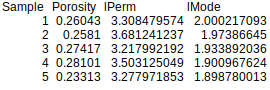

## Depth Plots of data:
### Porosity

(328.0, 1.0)

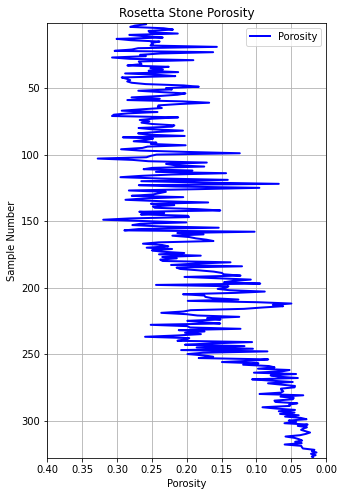

In [3]:
plt.figure(figsize=(5,8))
plt.plot(data.index, data["Porosity"])
plt.plot(data['Porosity'],data.index,label="Porosity",c="b",linewidth=2)
plt.xlabel("Porosity")
plt.ylabel("Sample Number")
plt.title("Rosetta Stone Porosity")
plt.legend(loc='best')
plt.grid(True)
plt.xlim(0.4,0)
plt.ylim(max(data.index),min(data.index))

### log10 of Permeability

(328.0, 1.0)

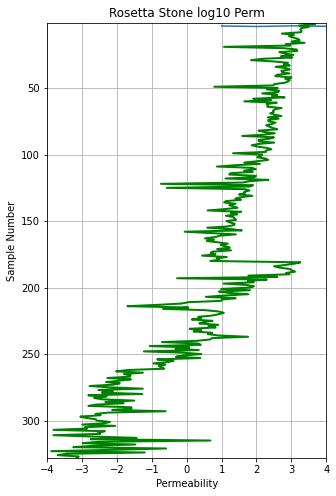

In [4]:
plt.figure(figsize=(5,8))
plt.plot(data.index, data["lPerm"])
plt.plot(data['lPerm'],data.index,color='green',linewidth=2)
plt.xlabel("Permeability")
plt.ylabel("Sample Number")
plt.title("Rosetta Stone log10 Perm")
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(max(data.index),min(data.index))

### log10 Mode of Pore Throat Distribution

(328.0, 1.0)

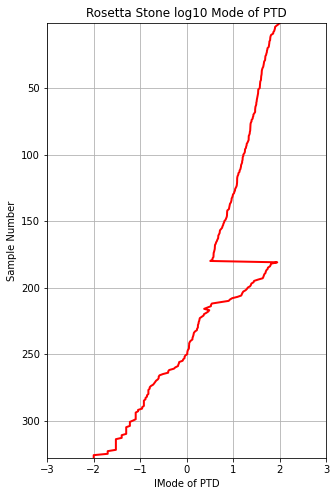

In [5]:
plt.figure(figsize=(5,8))
plt.plot(data['lMode'],data.index,c="r",linewidth=2)
plt.xlabel("lMode of PTD")
plt.ylabel("Sample Number")
plt.title("Rosetta Stone log10 Mode of PTD")
plt.grid(True)
#plt.xscale("log")
plt.xlim(-3,3)
plt.ylim(max(data.index),min(data.index))

## Create df:

In [6]:
df = data

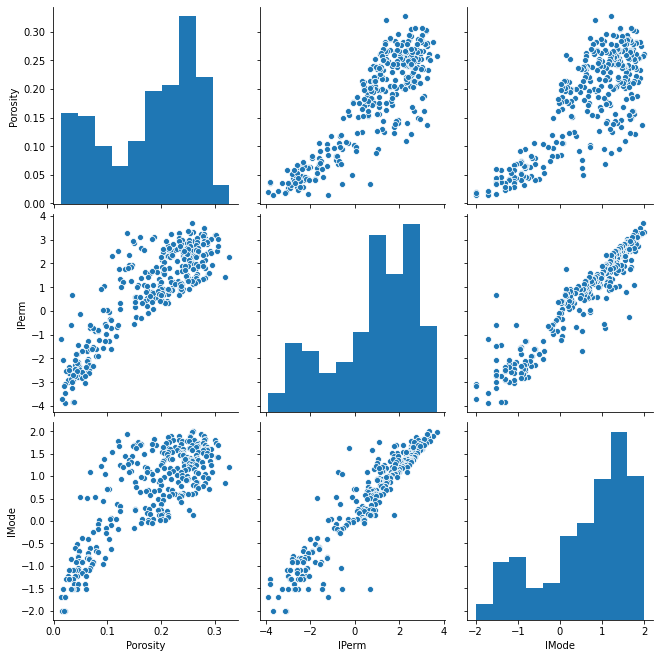

In [7]:
sns.pairplot(df.dropna(),height=3)

## Condition DataFrame:

In [8]:
df.head()
df = df.dropna()
df.fillna(-9999999999)
df.isnull().any()
#df

Porosity    False
lPerm       False
lMode       False
dtype: bool

## Split data into Training and Test data:
### 1) For inital training use train_test_split for random training/test data with lots of Epochs (> 100)
### 2) For final data use all data for test with 0 Epochs
### Run 1: enable df_train, df_test = train_test_split(df, test_size=0.2) and disable for Run 2

In [9]:
# 1st run - run > 100 epochs with 20% of the data first for training
from sklearn.model_selection import train_test_split
#df_train, df_test = train_test_split(df, test_size=0.2)


# normalize dataset with MinMaxScaler. This Normalizer appears to work, but not the de-normalizer below. 
scaler = MinMaxScaler() # For normalizing dataset

## Run 2: Enable the following lines

In [10]:
# 2nd run - now define zone of interest and use checkpoints from training before
df_train = df[:328] 
df_test = df[0:]  

## Single out Curve to predict:
### Drop Curve being predicted and normalize from 0 to 1
#### Apply to both Training and Test datasets

In [11]:
# lMode max and min for de-normalization from 0 to 1 below
max_norm =  2
min_norm = -2

In [12]:
# Normalize training porosity and lperm data
X_train = scaler.fit_transform(df_train.drop(['lMode'],axis=1).as_matrix())
# Normalize training lmode data
y_train = scaler.fit_transform(df_train['lMode'].as_matrix().reshape(-1, 1))

### X_train looks to be normalized porosity and perm
### y_train looks to be normalized lMode

# normalize from 0 to 1 
#X_train = df_train.drop(['lMode'],axis=1).as_matrix()
#y_train = (((df_train['lMode']-(min_norm))/(max_norm-(min_norm)))).as_matrix().reshape(-1,1)

In [13]:
# Normalize test porosity and lperm data
X_test = scaler.fit_transform(df_test.drop(['lMode'],axis=1).as_matrix())
# Normalize test lmode data
y_test = scaler.fit_transform(df_test['lMode'].as_matrix().reshape(-1,1))

#X_train # looks to be normalized porosity and perm
#y_train #looks to be normalized lMode

# normalize from 0 to 1 
#X_test = df_test.drop(['lMode'],axis=1).as_matrix()
#y_test = (((df_test['lMode']-(min_norm))/(max_norm-(min_norm)))).as_matrix().reshape(-1,1)

## Denormalize (does not work - fix bug?):

In [14]:
def denormalize(df,norm_data):
    df = df['lMode'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    #scl = MinMaxScaler()
    scl = MinMaxScaler(feature_range=(-1, 1))
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    print(scl)
    return new

## Define Neural Network:

In [15]:
"""
neural_net_model is function applying 2 hidden layer feed forward neural net.
Weights and biases are abberviated as W_1, W_2 and b_1, b_2 
These are variables with will be optomized during training.
"""
def neural_net_model(X_data,input_dim):
    
    # layer 1 multiplying and adding bias then activation function
    W_1     = tf.Variable(tf.random_uniform([input_dim, 10]))
    b_1     = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data, W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    # layer 2 multiplying and adding bias then activation function
    W_2     = tf.Variable(tf.random_uniform([10,10]))
    b_2     = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)

    # O/p layer multiplying and adding bias then activation function
    # notice output layer has one node only since performing #regression    
    W_O     = tf.Variable(tf.random_uniform([10, 1]))
    b_O     = tf.Variable(tf.zeros([1]))
    output  = tf.add(tf.matmul(layer_2, W_O), b_O)
    return output


    
    
xs     = tf.placeholder("float")
ys     = tf.placeholder("float")

'''- This is the number of training curves being used:
    *************   '''
output = neural_net_model(xs,2)  # 2 training curves
''' *************   '''

# our mean squared error cost function
cost   = tf.reduce_mean(tf.square(output-ys))

# Gradinent Descent optimiztion just discussed above for updating weights and biases
train  = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

##output is <tf.Tensor 'Add_8:0' shape=<unknown> dtype=float32>
#cost <tf.Tensor 'Mean_3:0' shape=() dtype=float32>
#train <tf.Operation 'GradientDescent_4' type=NoOp>

## Training:
### 1) Run 1: Run 500 epochs using 20% training set and save weights. Turn off restore weights on run 1?
### 2) Run 2: After training, run 0 epochs restoring the training weights.

INFO:tensorflow:Restoring parameters from yahoo_dataset.ckpt


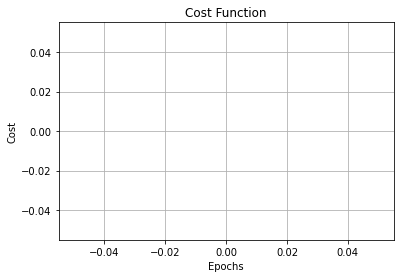

In [16]:
c_t    = []
c_test = []
count  = []


epochs = 500 # with 20% training
epochs =  0 # over all the data

with tf.Session() as sess:

    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    
    '''
    In case you save weights, this is called at the end
    '''
    saver = tf.train.Saver()
    #############saver = tf.train.Checkpoint()
    
    '''
    This next line will load the previous weights just the way it is written.
    It appears to be best to use 20% of random data to train with 50-100 epochs,
    and save the weights from that.
    
    Then load those weights using saver.restore over the zone of interest, 
    and use only 2-5 epochs on the zone of interest + previous checkpoints.
    '''
    saver.restore(sess,'yahoo_dataset.ckpt')
    
    for i in range(epochs):
        for j in range(X_train.shape[0]):
            '''
            the reshape(1,10) or (1, x ) x is number of curves used for training is set 
            in line below. Adjust also in paragraph above too.
            Run cost and train with each sample
            '''            
            sess.run([cost,train],feed_dict = {xs:X_train[j,:].reshape(1,2), ys:y_train[j]})
            
        count.append(i)
        c_t.append(sess.run(cost, feed_dict    = {xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict = {xs:X_test,ys:y_test}))
        print('Epoch :',i,'Cost :',c_t[i])
    
    
    # predict output of test data after training
    pred = sess.run(output, feed_dict = {xs:X_test})
    #### print('Cost :',sess.run(cost, feed_dict = {xs:X_test,ys:y_test}))
    
    '''
    De-normalization appears to change the data a bit. Bring this pred into Geolog,
    Cross Plot it against ILD in Geolog, and then calculate a better ILD. 
    
    I do not trust their de-norm, use my max, min
    ''' 
    #y_test = denormalize(df_test, y_test)
    #pred   = denormalize(df_test, pred)
    y_test = y_test*(max_norm - min_norm) -min_norm
    pred   = pred*(max_norm - min_norm) -min_norm

    plt.plot(count,c_t, label="Cost",c="b")
    plt.grid(True)
    #plt.ylim(max(y_test.shape[0]),min(y_test.shape[0]))
    #plt.legend(loc='best')
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    plt.title('Cost Function')
    plt.show()

 
    '''
    Save the checkpoint training weights and load them again if needed per below:
    '''
    if epochs > 100: 
        if input('Save model ? [Y/N]') == 'Y':
            saver.save(sess,'yahoo_dataset.ckpt')
            print('Model Saved') 


## Plots to confirm Predicted Mode (log10) estimations

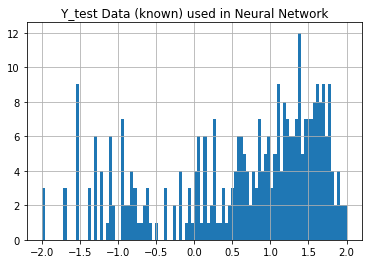

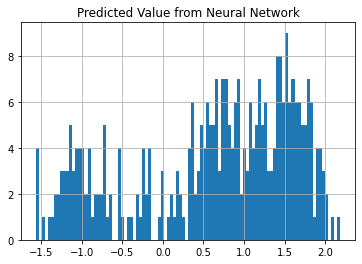

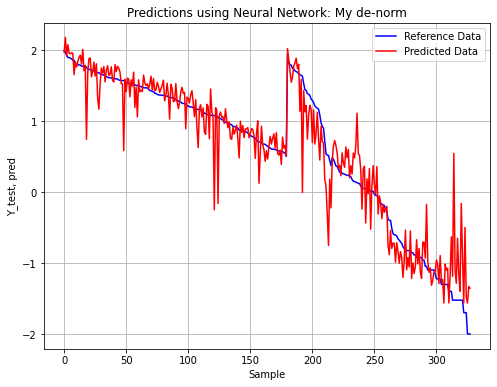

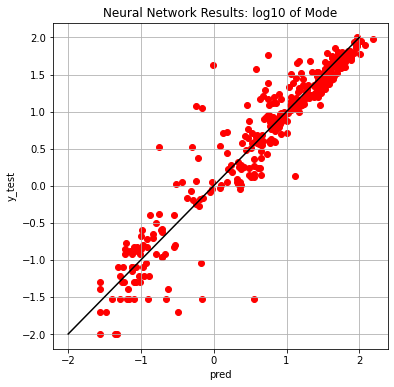

In [17]:
'''
Plots of test results
'''
# y_test is the normalized lMode data
plt.hist(y_test, 100)
plt.grid(True)
plt.title('Y_test Data (known) used in Neural Network')
plt.show()

# pred is the normalized predictions
plt.hist(pred, 100)
plt.grid(True)
plt.title('Predicted Value from Neural Network')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(y_test.shape[0]),y_test, label="Reference Data",c="b")
plt.plot(range(y_test.shape[0]),  pred, label="Predicted Data", c="r")
plt.grid(True)
#plt.ylim(max(y_test.shape[0]),min(y_test.shape[0]))
plt.legend(loc='best')
plt.ylabel('Y_test, pred')
plt.xlabel('Sample')
plt.title('Predictions using Neural Network: My de-norm')
plt.show()



plt.figure(figsize=(6,6))
#plt.scatter(pred, y_test,  c="r")
plt.scatter(pred, y_test,  c="r")
plt.plot([-2,2],[-2,2], c="k")
#m, b = np.polyfit(pred, y_test,1)
#plt.plot(pred, m*pred + b)
plt.grid(True)
plt.ylabel('y_test')
plt.xlabel('pred')
plt.title('Neural Network Results: log10 of Mode')
plt.show()




## Save csv results:

In [18]:
savetxt('Mode_tf_estimate.csv', pred, delimiter =',')
#savetxt('AllData_with_Predictions.csv',df_test, delimiter =',')

## Eventually this section will run again restoring training weights and making estimations for Mode:
### This is not working yet. Need to reset depths and make new estimations, but the plots are good.
### I tried to make estimations again, but it appears that it corrupts the data

In [19]:
#with tf.Session() as sess:
#    #saver.restore(sess,'yahoo_dataset.ckpt')    
#    pred2   = sess.run(output, feed_dict = {xs:X_test})    
#    pred2   = pred*(max_norm - min_norm) -2

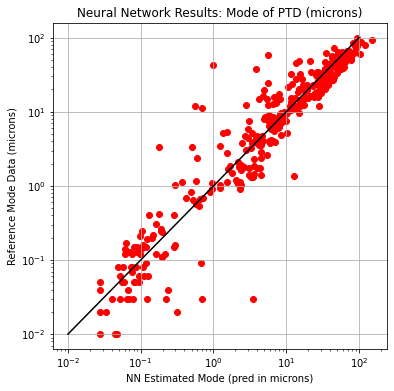

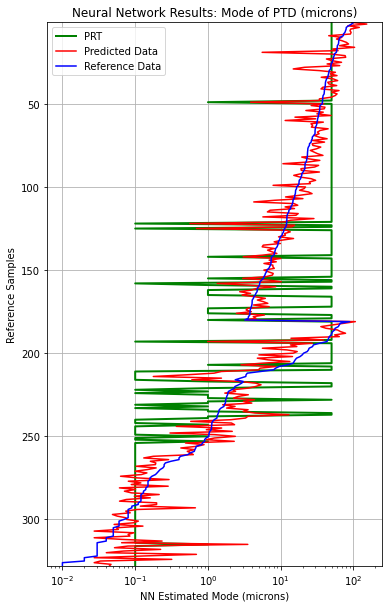

In [42]:
'''
Plots of test results
'''
PRT_plot = []

for i in range(len(pred)):
    if pred[i] > 0.62:
        PRT = 50
    elif pred[i] < 0.35:
        PRT = .1
    else:
        PRT = 1
    
    PRT_plot.append(PRT)


plt.figure(figsize=(6,6))
#plt.scatter(pred, y_test,  c="r")
plt.scatter(10**pred, 10**df_test['lMode'],  c="r")
plt.plot([.01,100],[.01,100], c="k")
#m, b = np.polyfit(pred, y_test,1)
#plt.plot(pred, m*pred + b)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylabel('Reference Mode Data (microns)')
plt.xlabel('NN Estimated Mode (pred in microns)')
plt.title('Neural Network Results: Mode of PTD (microns)')
plt.show()



plt.figure(figsize=(6,10))
#plt.scatter(pred, y_test,  c="r")
plt.plot(PRT_plot             , data.index,  c="g", label = 'PRT',linewidth=2)
plt.plot(10**pred             , data.index,  c="r", label = 'Predicted Data')
plt.plot(10**df_test['lMode'] , data.index,  c="b", label = 'Reference Data')
#plt.plot(pred, m*pred + b)
plt.xscale('log')
plt.ylim(max(data.index),min(data.index))
plt.grid(True)
plt.ylabel('Reference Samples')
plt.xlabel('NN Estimated Mode (microns)')
plt.title('Neural Network Results: Mode of PTD (microns)')
plt.legend()
plt.show()
